# Listening to the audio
This code enables you to listen to a sample sine wave audio.

In [2]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import torch
import csv
from sklearn.decomposition import PCA
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.externals import joblib
from numpy import fft

In [3]:
SAMPLE_RATE = 22050

In [4]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)
#print len(signal)
ipd.Audio(signal, rate=SAMPLE_RATE)

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [12]:
y_train = np.load('y_train.npy')

In [5]:
X_train =  np.load('x_train.npy')

In [6]:
np.shape(X_train)

(6325, 88200)

In [7]:
f = open('train.csv', 'r')
reader = csv.reader(f)

# Get desired columns and rows from csv, 
# Each row is a sublist inside of lst
# Right now it is taking rows 0 to 70
# and columns 0:10
train = []
i = 0

for row in itertools.islice(reader, 0, 6325):
    if i % 100 == 0:
        print(i)
    i += 1
    train.append(map(float, row[0:88201]))

train=np.array(train)
#Just some re-shaping and dimension finding
#N = 1
#print "N:",N
# train = signal[np.newaxis,:]
print "Train shape",train.shape
N_train = train.shape[0]
NUM_SAMPLES = train.shape[1]-1

X_train = train[:,:-1]
y_train = train[:,-1]
y_train = y_train.reshape(N_train,1)

print X_train.shape
print y_train

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
Train shape (6325, 88201)
(6325, 88200)
[[ 5.]
 [ 0.]
 [ 8.]
 ..., 
 [ 5.]
 [ 0.]
 [ 2.]]


In [ ]:
n

In [37]:
min(np.fft.rfft(X_train[5]))

(-1.8571733876372564e-11-1.5566262916948089e-11j)

In [ ]:
np.fft(X_train)

In [9]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [7]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [30]:
def write_predictions(predictions, ids, outfile):
    """
    assumes len(predictions) == len(ids), and that predictions[i] is the
    index of the predicted class with the malware_classes list above for 
    the executable corresponding to ids[i].
    outfile will be overwritten
    """
    with open(outfile,"w+") as f:
        # write header
        f.write("Id,Prediction\n")
        for i, history_id in enumerate(ids):
            f.write("%s,%d\n" % (history_id, predictions[i]))

In [ ]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)
#print len(signal)
ipd.Audio(signal, rate=SAMPLE_RATE)

In [130]:
song[7]

array([-31.62369005, -31.68791171, -31.88238743, -32.21976791,
       -32.67398408, -33.30316589, -34.05027347, -34.97704563,
       -36.13978721, -37.47765409, -39.12282632, -41.05634223,
       -43.38443573, -46.27810104, -49.54324975, -53.7985615 ,
       -59.32961708, -66.39458387, -80.        , -80.        ,
       -77.9378865 , -77.80209399, -80.        , -80.        ,
       -80.        , -80.        , -80.        , -80.        ,
       -80.        , -80.        , -80.        , -79.61591521,
       -78.73311263, -80.        , -79.33095681, -80.        ,
       -80.        , -78.94409211, -80.        , -80.        ,
       -78.92237143, -80.        , -80.        , -79.26449999,
       -80.        , -80.        , -79.99382842, -80.        ,
       -79.47605749, -80.        , -80.        , -79.00112959,
       -80.        , -80.        , -78.89526788, -80.        ,
       -80.        , -79.1513525 , -80.        , -80.        ,
       -79.78683382, -80.        , -79.6429186 , -80.  

In [190]:
song = mel_spec(X_train[1])

In [143]:
X_train = train[:,:-1]
y_train = train[:,-1]
y_train = y_train.reshape(N_train,1)

In [188]:
ipd.Audio(X_train[14], rate=SAMPLE_RATE)

In [346]:
song = mel_spec(X_train[75])

In [376]:
N = len(song[1])
for i in range(len(song)):
    if np.min(song[i]) > -40:
        if y_train[1] == 0:
            song[i] = [-80 for _ in range(N)]
            print(i)
        else:
            song[i] = song[i-1]

In [13]:
y_train[75]

array([ 2.])

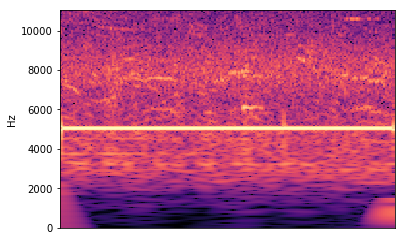

In [377]:
librosa.display.specshow(mel_spec(X_train[75]), y_axis='hz')

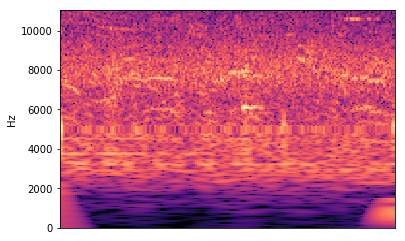

In [348]:
librosa.display.specshow(song, y_axis='hz')

In [19]:
train_spec = mel_spec(X_train[1])

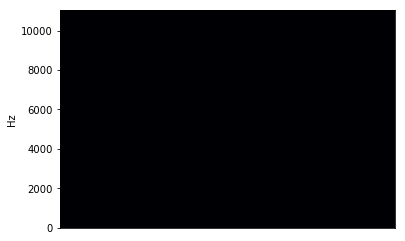

In [20]:
N = len(song[1])
for j in range(len(train_spec)):
    if y_train[i] == 0:
        train_spec[j] = train_spec[j] = [-80 for _ in range(N)]
    elif np.min(train_spec[j]) > -40:
        if j > 0:
            train_spec[j] = train_spec[j - 1]
        else:
            train_spec[j] = [-80 for _ in range(N)]
librosa.display.specshow(train_spec, y_axis='hz')

/Users/William/anaconda/lib/python2.7/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


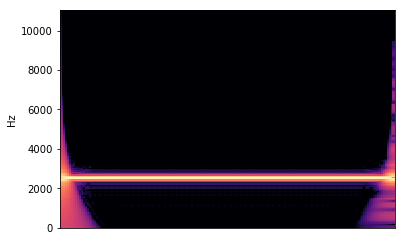

In [10]:
librosa.display.specshow(mel_spec(X_train[1]), y_axis='hz')

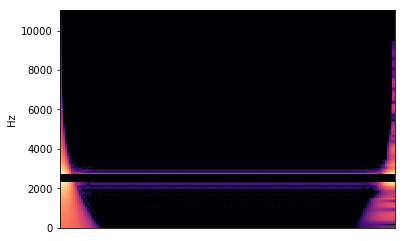

In [17]:
librosa.display.specshow(song, y_axis='hz')

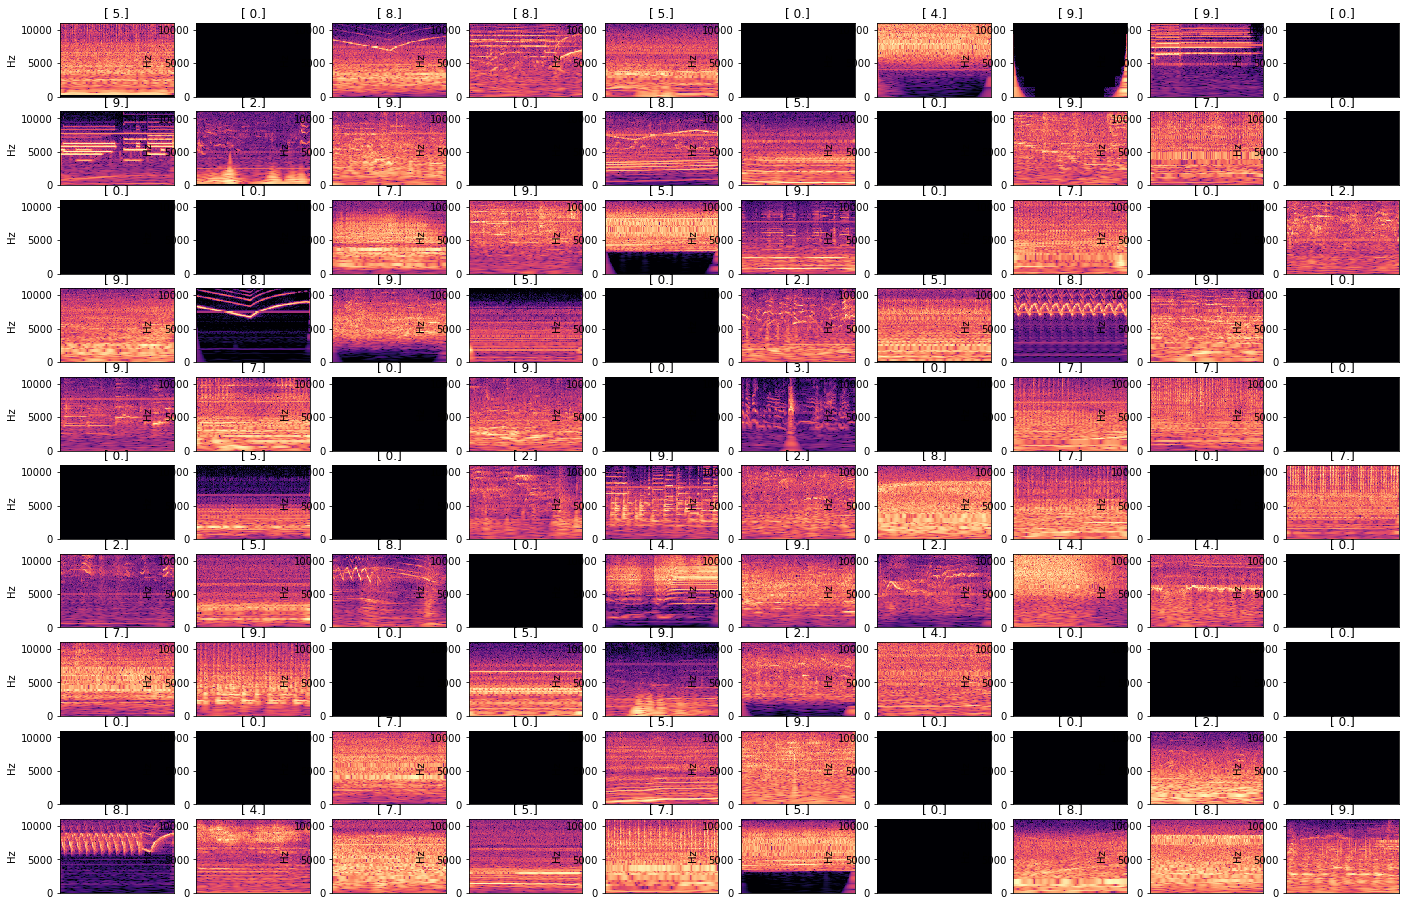

In [40]:
plt.figure
plt.figure(figsize=(24, 16))
for i in range(0, 100):
    plt.subplot(10,10,i + 1)
    train_spec = mel_spec(X_train[i])
    for j in range(len(train_spec)):
        if y_train[i] == 0:
            train_spec[j] = train_spec[j] = [-80 for _ in range(N)]
        elif np.min(train_spec[j]) > -40:
            if j > 0:
                train_spec[j] = train_spec[j - 1]
            else:
                train_spec[j] = [-80 for _ in range(N)]
    librosa.display.specshow(train_spec, y_axis='hz')
    plt.title(str(y_train[i]))

In [295]:
librosa.feature.mfcc(X_train[1])

array([[ -5.95986695e+02,  -6.42503963e+02,  -7.76417221e+02, ...,
         -7.76471454e+02,  -6.72147299e+02,  -5.99138995e+02],
       [  1.98086796e+02,   1.75654358e+02,   4.47193912e+01, ...,
          4.46465655e+01,   1.55769765e+02,   1.96896309e+02],
       [  5.89184919e+01,   7.52886953e+01,   4.40339371e+01, ...,
          4.39725478e+01,   8.38800763e+01,   6.00170375e+01],
       ..., 
       [  1.09999622e+00,   1.37075907e+00,   2.47810500e+00, ...,
          2.72105047e+00,   1.04585354e+00,   1.09217442e+00],
       [  3.11311489e-02,   1.39490400e-01,  -2.68680751e-01, ...,
         -4.43968888e-02,   3.78591103e-02,   1.45897452e-01],
       [ -4.04445971e-01,  -6.11649703e-01,  -2.79018890e+00, ...,
         -2.58987150e+00,  -4.01390748e-01,  -4.93373174e-01]])

In [ ]:
for i in range(len(X_train)):
    if y_train[i] == 0:
        X_train[i] = [0 for _ in range(len(X_train[i]))]

In [326]:
i = 1
train_spec = mel_spec(X_train[i])
for i in range(len(train_spec)):
    if np.min(train_spec[i]) > -40:
        if i > 0:
            train_spec[i] = train_spec[i - 1]
        else:
            train_spec[i] = [-80 for _ in range(N)]
# [item for sublist in train_spec for item in sublist]

In [327]:
train_spec

array([[-33.10589407, -33.1530126 , -33.28253137, ..., -55.76896308,
        -55.62971866, -55.59946702],
       [-32.88474459, -32.92770881, -33.09109242, ..., -55.98251892,
        -56.21380863, -55.84275692],
       [-32.69422739, -32.75623909, -32.89823869, ..., -59.86116332,
        -59.34010656, -59.62300696],
       ..., 
       [-74.73977298, -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-75.01890908, -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-75.32364258, -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

In [89]:
FEATS = train_spec.shape[0]
FRAMES = train_spec.shape[1]
N_train = X_train.shape[0]
tmp_train_melspec = np.zeros((N_train,FEATS*FRAMES))

for i in range(N_train):
    if i % 100 == 0:
        print(i)
    train_spec = mel_spec(X_train[i])
    tmp_train_melspec[i,:] = [item for sublist in train_spec for item in sublist] #mel_spec(X_train[i])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300


In [385]:
np.save('x_train.npy',X_train)

In [386]:
np.save('y_train.npy',y_train)

In [57]:
np.save('new_train_spec.npy',tmp_train)

In [384]:
train = np.load('train_spec.npy')

In [33]:
f = open('test.csv', 'r')
reader = csv.reader(f)
test = []
for row in itertools.islice(reader, 0, 1000):
    test.append(map(float, row[1:88201]))
test=np.array(test)

In [34]:
N_test = test.shape[0]
X_test = test[:,:-1]
y_test = test[:,-1]
song = X_test[0]
test_spec = mel_spec(song)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

tmp_test = np.zeros((N_test,FEATS*FRAMES))

print test.shape

for i in range(N_test):
    test_spec = mel_spec(test[i])
    tmp_test[i,:] = [item for sublist in test_spec for item in sublist] #mel_spec(X_train[i])

np.save('test_spec.npy',tmp_test)

(1000, 88200)


In [28]:
tmp_test = np.load('test_spec.npy')

In [49]:
tmp_train = np.load('new_train_spec.npy')

In [124]:
rf = RandomForestClassifier()
rf.fit(tmp_train,y_train)

/Users/William/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [125]:
tmp_train[4]

array([-46.44521106, -46.10245231, -45.31575021, ..., -54.40745534,
       -64.86488094, -59.20606582])

In [60]:
tmp_train[7]

array([-13.32004412, -13.36687077, -13.49748376, ..., -80.        ,
       -80.        , -80.        ])

In [126]:
preds = rf.predict(tmp_test)
test_ids = range(len(preds))
write_predictions(preds, test_ids, 'rf_submission.csv')

In [100]:
tmp_test[12]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

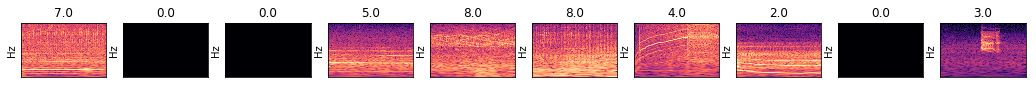

In [129]:
plt.figure
plt.figure(figsize=(18, 1))
for i in range(10,20):
    plt.subplot(1,10,i - 9)
    plt.xticks([])
    plt.yticks([])
    librosa.display.specshow(mel_spec(X_test[i +1]), y_axis='hz')
    plt.title(str(preds[i+ 1]))

In [423]:
ipd.Audio(X_test[80], rate=SAMPLE_RATE)

In [82]:
msk = np.random.rand(len(X_train)) < .5
# X_train_train = X_train[msk]
# X_train_test = X_train[~msk]
# FEATS = train_spec.shape[0]
# FRAMES = train_spec.shape[1]
# N_train = X_train_train.shape[0]
tmp_train_train = tmp_train[msk]
tmp_train_test = tmp_train[~msk]

# for i in range(N_train):
#     if i % 100 == 0:
#         print(i)
#     train_spec = mel_spec(X_train_train[i])
#     for j in range(len(train_spec)):
#         if y_train[i] == 0:
#             train_spec[j] = train_spec[j] = [0 for _ in range(N)]
#         elif np.min(train_spec[j]) > -40:
#             if j > 0:
#                 train_spec[j] = train_spec[j - 1]
#             else:
#                 train_spec[j] = [-80 for _ in range(N)]
#     tmp_train[i,:] = [item for sublist in train_spec for item in sublist] #mel_spec(X_train[i])

In [83]:
y_train_train = y_train[msk]
y_train_test = y_train[~msk]

In [84]:
rf.fit(tmp_train_train, y_train_train)

/Users/William/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [85]:
rf.score(tmp_train_test, y_train_test)

0.69757673667205167

In [88]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 300), random_state=1)
clf.fit(tmp_train_train, y_train_train)
print(clf.score(tmp_train_test, y_train_test))

0.794830371567


In [94]:
msk = np.random.rand(len(X_train)) < .5
# X_train_train = X_train[msk]
# X_train_test = X_train[~msk]
# FEATS = train_spec.shape[0]
# FRAMES = train_spec.shape[1]
# N_train = X_train_train.shape[0]
tmp_train_train = tmp_train_melspec[msk]
tmp_train_test = tmp_train_melspec[~msk]

# for i in range(N_train):
#     if i % 100 == 0:
#         print(i)
#     train_spec = mel_spec(X_train_train[i])
#     for j in range(len(train_spec)):
#         if y_train[i] == 0:
#             train_spec[j] = train_spec[j] = [0 for _ in range(N)]
#         elif np.min(train_spec[j]) > -40:
#             if j > 0:
#                 train_spec[j] = train_spec[j - 1]
#             else:
#                 train_spec[j] = [-80 for _ in range(N)]
#     tmp_train[i,:] = [item for sublist in train_spec for item in sublist] #mel_spec(X_train[i])

In [95]:
y_train_train = y_train[msk]
y_train_test = y_train[~msk]

In [96]:
rf.fit(tmp_train_train, y_train_train)
rf.score(tmp_train_test, y_train_test)

/Users/William/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.92124483963162906

In [97]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 300), random_state=1)
clf.fit(tmp_train_train, y_train_train)
print(clf.score(tmp_train_test, y_train_test))

0.979676087647
